In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the json data file 
data = pd.read_csv('../data/MI_seq.csv')



In [2]:
data = data.sort_values(['subject','trial'])
data.reset_index(drop = True, inplace = True)

In [3]:
data

,trialindex,trial,subject,tottime,rt,flashon1,flashon2,flashon3,flashon4,flashon5,...,ctime2,ctime3,ctime4,ctime5,ctime6,rel1,rel2,rel3,rel4,rel5
0,101,3,47066,6688,1545,white,grey,grey,white,white,...,6794,7014,7254,7487,7679,-117.0,-140.0,-159.0,-152.0,-111.0
1,103,5,47066,9367,1666,grey,white,white,white,grey,...,9323,9532,9767,10019,10362,-115.0,-128.0,-155.0,-172.0,-262.0
2,105,7,47066,11980,1603,white,grey,grey,grey,white,...,12036,12254,12489,12738,12975,-129.0,-138.0,-154.0,-169.0,-156.0
3,107,9,47066,14797,1808,grey,white,grey,grey,grey,...,14617,14833,15424,15626,15793,-133.0,-135.0,-511.0,-121.0,-86.0
4,109,11,47066,17436,1630,grey,white,white,white,white,...,17546,17763,17997,18231,18432,-131.0,-137.0,-153.0,-154.0,-120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,95,191,99663,312731,2125,white,white,grey,grey,white,...,312013,312327,312657,312985,313268,-164.0,-227.0,-211.0,-483.0,-290.0
436,96,193,99663,315889,2154,grey,white,grey,white,grey,...,315149,315472,315847,316136,316427,-164.0,-223.0,-174.0,-565.0,-340.0
437,97,195,99663,318709,1815,grey,white,grey,grey,grey,...,318067,318340,318644,318957,319245,-164.0,-173.0,-209.0,-179.0,-189.0
438,98,197,99663,321998,2284,white,grey,grey,grey,grey,...,320849,321108,321377,322271,322535,-164.0,-168.0,-200.0,-209.0,-169.0


In [4]:
data.columns

Index(['trialindex', 'trial', 'subject', 'tottime', 'rt', 'flashon1',
       'flashon2', 'flashon3', 'flashon4', 'flashon5', 'ontime1', 'ontime2',
       'ontime3', 'ontime4', 'ontime5', 'offtime1', 'offtime2', 'offtime3',
       'offtime4', 'offtime5', 'choice1n', 'choice2', 'choice3', 'choice4',
       'choice5', 'choice6', 'ctime1n', 'ctime2', 'ctime3', 'ctime4', 'ctime5',
       'ctime6', 'rel1', 'rel2', 'rel3', 'rel4', 'rel5'],
      dtype='object')

In [5]:
# align all times to the first choice

flashcols = ['flashon1','flashon2','flashon3','flashon4','flashon5']
flashoncols = ['ontime1','ontime2','ontime3','ontime4','ontime5']
flashoffcols = ['offtime1','offtime2','offtime3','offtime4','offtime5']
touchtcols = ['ctime1n', 'ctime2', 'ctime3', 'ctime4', 'ctime5', 'ctime6']

time_cols = [flashoncols, flashoffcols, touchtcols]
start_time = data.ctime1n

for cols in time_cols:
    
    data.loc[:, cols] = data[cols].subtract(start_time, axis = 0)

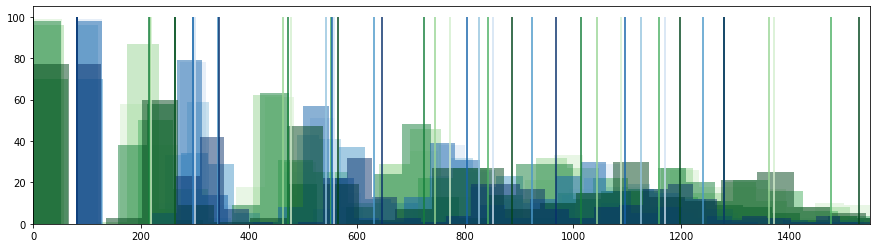

In [6]:
fig_timeline, axs_timeline = plt.subplots(1,1, figsize = (15,4))
subs = np.unique(data.subject)
flash_cmap = plt.cm.Blues(np.linspace(0.2, 1, len(subs)))
choice_cmap = plt.cm.Greens(np.linspace(0.2, 1, len(subs)))

for sub, fc, cc in zip(subs, flash_cmap, choice_cmap):
    
    flashes = []
    for flash in flashoncols:
        flashes.append(data[data.subject==sub][flash])
        axs_timeline.vlines(np.mean(data[data.subject==sub][flash]),0,100, color = fc)
    
    choices = []
    for choice in touchtcols:
        choices.append(data[data.subject==sub][choice])
        axs_timeline.vlines(np.mean(data[data.subject==sub][choice]),0,100, color = cc)

    axs_timeline.hist(choices, 40, color = [cc]*len(choices), alpha = 0.5,stacked = True)    
    axs_timeline.hist(flashes, 40, color = [fc]*len(flashes), alpha = 0.5,stacked = True)
    
    axs_timeline.set_xlim(0, 1550);

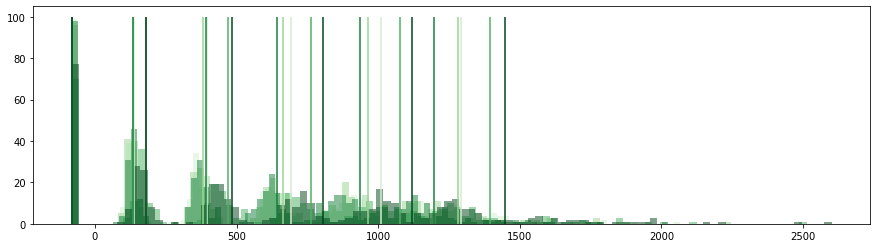

In [7]:
# express all rts relative to first flash
flash_dat = data.copy()
fig_flash1, axs_flash1 = plt.subplots(1,1, figsize = (15,4))

f1 = data.ontime1

for cols in time_cols:
    #print(cols)
    flash_dat.loc[:, cols] = flash_dat[cols].subtract(f1, axis = 0)
    
for sub, cc in zip(subs, choice_cmap):

    choices = []
    for choice in touchtcols:
        #print(choice)
        choices.append(flash_dat[flash_dat.subject==sub][choice])
        axs_flash1.vlines(np.mean(flash_dat[flash_dat.subject==sub][choice]),0,100, color = cc)

    axs_flash1.hist(choices, 100, color = [cc]*len(choices), alpha = 0.5,stacked = True);    
    
    #axs_flash1.set_xlim(-200, 1550);

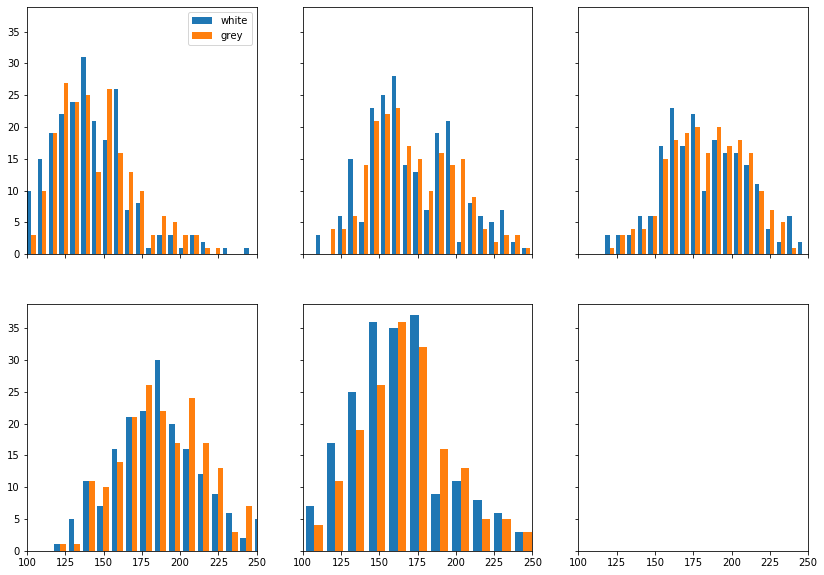

In [8]:
# computing movement rates following the procedure bz Rolfs et al 2008
# step one: pool data over conditions
# in this case, that means every single response will be aligned to the 
# previous flash and grouped after visible/invisible

times = []
conds = []
positions = []

for cond, flasht, choicet, pos in zip(flashcols, flashoncols, touchtcols[1:], np.arange(0,len(flashcols))):
    for idx in data.index:
        conds.append(data[cond][idx])
        times.append(data[choicet][idx]-data[flasht][idx])
        positions.append(pos)
        
ldf = pd.DataFrame(np.array([times,conds, positions]).T, columns = ['rt', 'cond', 'nr']) 

ldf.rt = ldf.rt.astype('float')
ldf.nr = ldf.nr.astype('int')

flash_rt = ldf[ldf.cond == 'white']
noflash_rt = ldf[ldf.cond == 'grey']

fig_poolrt, axs_poolrt = plt.subplots(2,3, figsize = (14,10), sharex = True, sharey = True)


axs_poolrt[0,0].hist([ldf[(ldf.cond=='white')& (ldf.nr==0)].rt,ldf[(ldf.cond=='grey')& (ldf.nr==0)].rt], 100, label = ['white', 'grey'])
axs_poolrt[0,0].set_xlim(100,250)
axs_poolrt[0,0].legend();

axs_poolrt[0,1].hist([ldf[(ldf.cond=='white')& (ldf.nr==1)].rt,ldf[(ldf.cond=='grey')& (ldf.nr==1)].rt], 100, label = ['white', 'grey'])
axs_poolrt[0,2].hist([ldf[(ldf.cond=='white')& (ldf.nr==2)].rt,ldf[(ldf.cond=='grey')& (ldf.nr==2)].rt], 100, label = ['white', 'grey'])
axs_poolrt[1,0].hist([ldf[(ldf.cond=='white')& (ldf.nr==3)].rt,ldf[(ldf.cond=='grey')& (ldf.nr==3)].rt], 100, label = ['white', 'grey'])
axs_poolrt[1,1].hist([ldf[(ldf.cond=='white')& (ldf.nr==4)].rt,ldf[(ldf.cond=='grey')& (ldf.nr==4)].rt], 100, label = ['white', 'grey']);

In [9]:
ldf

,rt,cond,nr
0,117.0,white,0
1,115.0,grey,0
2,129.0,white,0
3,133.0,grey,0
4,131.0,grey,0
...,...,...,...
2195,202.0,white,4
2196,211.0,grey,4
2197,206.0,grey,4
2198,184.0,grey,4


In [10]:
# allign all movements to the third flash

times = []
conds = []
positions = []

flasht = flashoncols[2]

for cond, choicet, pos in zip(flashcols, touchtcols[1:], np.arange(0,len(flashcols))):
    for idx in data.index:
        conds.append(data[cond][idx])
        times.append(data[choicet][idx]-data[flasht][idx])
        positions.append(pos)
        
ldf3 = pd.DataFrame(np.array([times,conds, positions]).T, columns = ['rt', 'cond', 'nr']) 

ldf3.rt = ldf3.rt.astype('float')
ldf3.nr = ldf3.nr.astype('int')

(array([  8.,  97., 775., 404., 395., 399.,  88.,  29.,   4.,   1.]),
 array([-977. , -668.2, -359.4,  -50.6,  258.2,  567. ,  875.8, 1184.6,
        1493.4, 1802.2, 2111. ]),
 <a list of 10 Patch objects>)

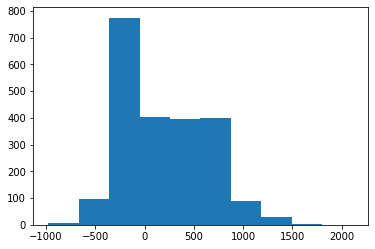

In [11]:
plt.hist(ldf3.rt)

In [72]:
# rolfs et al saccade rate

def causRate(msOns,wbLock,waLock,nt):
    # 
    #  analyse rate in causal time window
    # 
    #  input:    msOns   - microsaccade onset times
    #            wbLock  - window before lock
    #            waLock  - window after lock
    #            nt      - number of trials
    # 
    #  output:   rate    - microsaccade rate
    #            scale   - time axis
    # 
    #  12.12.2005 by Martin Rolfs
    #  12.03.2021 translated to Python by Clara Kuper

    if type(nt) == int:
        nt = [nt]*len(range(-wbLock,waLock))
    elif not len(nt) == len(range(-wbLock,waLock)):
        raise ValueError('nt must have the same length as -wbLock:waLock!')
    
    alpha = 1/20
    scale = np.array([])
    rate = np.array([])
    
    for t in range(-wbLock,waLock):
        scale = np.append(scale,t)
        tau = t-msOns+1/alpha
        tau = tau[tau>0]
        causal = alpha**2*tau*np.exp(-alpha*tau)
        #try:
        rate = np.append(rate,np.sum(causal)*1000/nt[len(scale)-1]) 
        #except:
        #    print(rate, scale)
    return rate, scale


In [16]:
ldf3.rt

0       -301.0
1       -289.0
2       -298.0
3       -296.0
4       -298.0
         ...  
2195     861.0
2196     874.0
2197     824.0
2198    1346.0
2199     827.0
Name: rt, Length: 2200, dtype: float64

In [74]:
msOns = ldf3.rt.values

rate,scale = causRate(msOns, 500,500, 100)

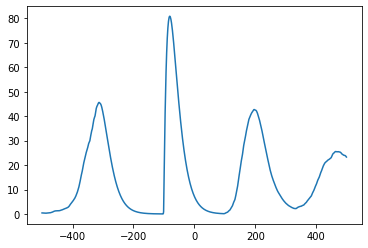

In [76]:
plt.plot(scale,rate)

In [14]:

# function [rate, scale] = causRate(msOns,wbLock,waLock,nt)
# %
# % analyse rate in causal time window
# %
# % input:    msOns   - microsaccade onset times
# %           wbLock  - window before lock
# %           waLock  - window after lock
# %           nt      - number of trials
# %
# % output:   rate    - microsaccade rate
# %           scale   - time axis
# %
# % 12.12.2005 by Martin Rolfs
# ​
# if length(nt)==1
#     nt = linspace(nt,nt,length((-wbLock:waLock)));
# elseif length(nt)~=length(-wbLock:waLock)
#     error('nt must have the same length as -wbLock:waLock!')
# end
    
# alpha = 1/20;
# scale = [];
# rate = [];
# for t=-wbLock:waLock
#     scale = [scale; t];
#     tau = t-msOns+1/alpha;
#     tau = tau(tau>0);
#     causal = alpha^2*tau.*exp(-alpha*tau);
#     rate = [rate; sum(causal)*1000/nt(length(scale))];
# end